<a href="https://colab.research.google.com/github/eridanletalis/mlalgs/blob/master/mlalg_hw_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt


1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.  
2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).
4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).
5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?
7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [0]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [0]:
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res

In [0]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

**Делаем функцию calc_logloss невосприимчивой к нулям под знаком логарифма**

---



In [0]:
def calc_logloss(y, y_pred):

  # На время отладки конвертируем y_pred во флоат принудительно

  y_pred = y_pred.astype(float)
  
  a = np.where(y_pred == 0.0) # Ищем индексы элементов со значением ноль
  b = np.where(y_pred == 1.0) # Ищем индексы элементов со значением 1

  y_pred[a] += np.finfo(np.float).eps # Прибавляем к нулям машинную эпсилон
  y_pred[b] -= np.finfo(np.float).eps # Отнимаем от единиц машинную эпсилон

  # Теперь под знаком логарифма гарантированно отсутствует ноль.

  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
  return err

In [9]:
# Поменяем местоми y1 и y1_pred, чтобы в функцию попали нули и единицы
y1 = np.array([1, 0, 0, 1])
y_pred1 = np.array([0.9, 0.1, 0.1, 0.9])
calc_logloss(y_pred1, y1)

# До изменения ответом была + бесконечность

3.604365338911715

In [10]:
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

# Работа в штатном режиме (без нулей) не пострадала

0.10536051565782628

In [0]:
def sigmoid(z):
  res = 1 / (1 + np.exp(-z))
  return res

In [12]:
z = np.linspace(-10, 10, 101)
z

array([-10. ,  -9.8,  -9.6,  -9.4,  -9.2,  -9. ,  -8.8,  -8.6,  -8.4,
        -8.2,  -8. ,  -7.8,  -7.6,  -7.4,  -7.2,  -7. ,  -6.8,  -6.6,
        -6.4,  -6.2,  -6. ,  -5.8,  -5.6,  -5.4,  -5.2,  -5. ,  -4.8,
        -4.6,  -4.4,  -4.2,  -4. ,  -3.8,  -3.6,  -3.4,  -3.2,  -3. ,
        -2.8,  -2.6,  -2.4,  -2.2,  -2. ,  -1.8,  -1.6,  -1.4,  -1.2,
        -1. ,  -0.8,  -0.6,  -0.4,  -0.2,   0. ,   0.2,   0.4,   0.6,
         0.8,   1. ,   1.2,   1.4,   1.6,   1.8,   2. ,   2.2,   2.4,
         2.6,   2.8,   3. ,   3.2,   3.4,   3.6,   3.8,   4. ,   4.2,
         4.4,   4.6,   4.8,   5. ,   5.2,   5.4,   5.6,   5.8,   6. ,
         6.2,   6.4,   6.6,   6.8,   7. ,   7.2,   7.4,   7.6,   7.8,
         8. ,   8.2,   8.4,   8.6,   8.8,   9. ,   9.2,   9.4,   9.6,
         9.8,  10. ])

In [0]:
### Logistic Regression

def eval_model(X, y, iterations, alpha=1e-4):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    err = calc_logloss(y, y_pred)
    W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W
  

In [14]:
W = eval_model(X_st, y, iterations=1000, alpha=1e-4)

100 [ 0.49282748 -0.15007528  0.64748973  1.51727915] 1.2014814214705334
200 [ 0.48896219 -0.16184918  0.64728128  1.51155738] 1.1828456288538924
300 [ 0.48511874 -0.17358386  0.64706349  1.50586552] 1.1643525542846556
400 [ 0.4812976  -0.18527698  0.64683669  1.50020462] 1.1460086359433084
500 [ 0.47749927 -0.19692597  0.64660127  1.4945758 ] 1.127820879406358
600 [ 0.47372426 -0.20852799  0.6463577   1.48898028] 1.109796908143704
700 [ 0.46997312 -0.22007992  0.6461065   1.48341934] 1.0919450148769096
800 [ 0.46624642 -0.23157833  0.64584825  1.47789438] 1.074274212586137
900 [ 0.46254476 -0.24301946  0.64558365  1.4724069 ] 1.0567942835649755
1000 [ 0.45886878 -0.25439917  0.64531344  1.46695851] 1.0395158244739489


**Подбор параметров логистической регрессии**

---



In [0]:
### Logistic Regression

eps = 1e-5
max_iteration = int(1e+6)
alpha_stack = np.array([100 / x for x in range(1, 101)])



def eval_model_epic_test(X, y):
  Ws = []
  losses = []
  iterations = []
  
  for alpha in alpha_stack:
    last_err = np.inf
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]

    for i in range(1, max_iteration+1):
      z = np.dot(W, X)
      y_pred = sigmoid(z)
      err = calc_logloss(y, y_pred)
      W -= alpha * (1/n * np.dot((y_pred - y), X.T))

      if i % (100) == 0:
        print(i, W, err, alpha)

      if np.abs(err - last_err) < eps:
        break
      
      last_err = err
      
    print(f"Подбор завершился при альфа {alpha} на итерации {i}, значение функции потерь {err}.")
    print(W)

   
    Ws.append(W)
    losses.append(err)
    iterations.append(i)

  return Ws, losses, iterations
  

In [36]:
losses

[0.00018120173599719334,
 0.004064787283893942,
 0.00682001474491738,
 0.040194865441970436,
 0.02424977703870723,
 0.03555449777537689,
 0.11180894753080614,
 0.11405113717153947,
 0.09767510071531509,
 0.0763906110980983,
 0.08266881475414481,
 0.10230792818872028,
 0.09560212443976461,
 0.1147079580670386,
 0.10839572910972213,
 0.11429723095720538,
 0.12052149037540094,
 0.11740467919203308,
 0.12368938469922075,
 0.12751914083819188,
 0.14519315128777163,
 0.1491140497150075,
 0.15515041697657875,
 0.15038046709784805,
 0.16037890627057574,
 0.1662908735108748,
 0.16081466736702343,
 0.17594068010650768,
 0.17491604435264113,
 0.19674490173422426,
 0.14868797786345625,
 0.15144964537264285,
 0.20865038432429936,
 0.15699696880573605,
 0.15983351121230263,
 0.1626615053791413,
 0.16539141040826846,
 0.1682667336065239,
 0.17110795138225937,
 0.17387987962553195,
 0.1768007475490531,
 0.1796632176198298,
 0.18267119539110946,
 0.24503340957968928,
 0.24730308892194,
 0.1915084235029

**Реализация функций, возвращающих предсказание в виде вероятности и в виде класса**

---



In [0]:
def calc_pred_proba(W, X):
  return sigmoid(W@X).flatten()

def calc_pred(W, X, thres=0.8):
  return ((calc_pred_proba(W,X) - thres) >= 0).astype(float)

In [98]:
calc_pred(Ws[99], X_st)

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 1.])

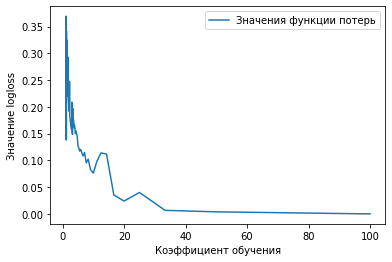

In [27]:
plt.plot(alpha_stack, losses, label="Значения функции потерь")
plt.xlabel("Коэффициент обучения")
plt.ylabel("Значение logloss")
plt.legend()

Text(0, 0.5, 'Число итераций')

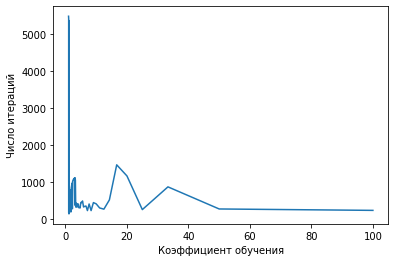

In [28]:
plt.plot(alpha_stack, iterations, label="Количество итераций")
plt.xlabel("Коэффициент обучения")
plt.ylabel("Число итераций")